# Lab imbalanced data

### 1. load dataset and explore variables

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('files_for_lab/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
def clean_bools(x):
    if isinstance(x,str):
        x = x.lower()
        if x == 'yes':
            return 1
        elif x == 'no phone service':
            return 0
        elif x == 'dsl':
            return 1
        elif x== 'no internet service':
            return 0
        elif x== 'no':
            return 0
        else:
            return x
    else:
        return x
for i in df.columns:
    df[i] = list(map(clean_bools, df[i]))

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,0,1,0,...,0,0,0,0,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,0,1,1,...,1,0,0,0,one year,0,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,0,0,2,1,0,1,1,...,0,0,0,0,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,0,1,1,...,1,1,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,0,fiber optic,0,...,0,0,0,0,month-to-month,1,electronic check,70.70,151.65,1


In [6]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

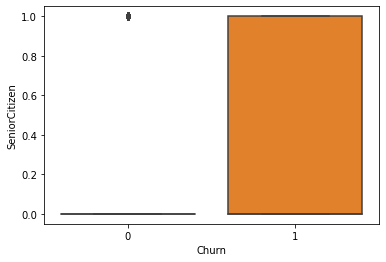

In [7]:
sns.boxplot(x ='Churn',y='SeniorCitizen', data=df)
plt.show()

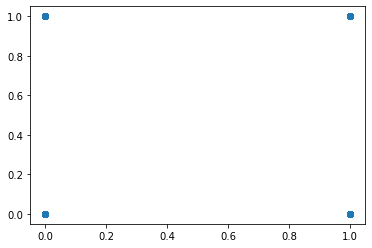

In [8]:
plt.scatter(x=df['SeniorCitizen'], y=df['Churn'])
plt.show()

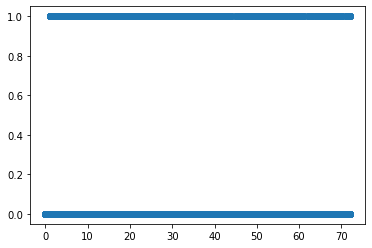

In [9]:
plt.scatter(x=df['tenure'], y=df['Churn'])
plt.show()

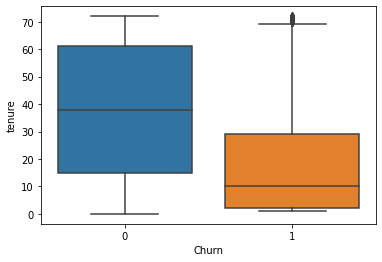

In [10]:
sns.boxplot(x ='Churn',y='tenure', data=df)
plt.show()

### 2. Use variables Tenure, SeniorCitizen and MonthlyCharges
### 3. Extract the target variable
### 4. Extract the independent variables and scale them.
### 5. Build the logistic regression model.

In [11]:
df_num = df[['tenure', 'SeniorCitizen','MonthlyCharges']]
Y = pd.DataFrame(data=df, columns=['Churn'])
transformer = StandardScaler().fit(df[['tenure','SeniorCitizen','MonthlyCharges']])
scaled_x = transformer.transform(df[['tenure','SeniorCitizen','MonthlyCharges']])

classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, df['Churn'])
                        
print("The accuracy of the model is: ",round(classification.score(scaled_x, df['Churn']),2))
print("The kappa of the model is: ",round(cohen_kappa_score(Y,classification.predict(scaled_x)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.41


In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [13]:
df_up = RandomOverSampler()
X = df[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
y = df['Churn']
X_up, y_up = df_up.fit_sample(X_scaled, y)

In [14]:
pd.DataFrame(y_up).value_counts()

Churn
1        5174
0        5174
dtype: int64

In [15]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_up, y_up)

print("The accuracy of the model is: ",round(classification.score(X_up, y_up),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_up,classification.predict(X_up)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.46


In [16]:
print(X_up.shape)

(10348, 3)


In [17]:
y_up.shape

(10348,)

In [18]:
df2 = pd.concat([pd.DataFrame(X_up[:,0]),pd.DataFrame(X_up[:,1]),pd.DataFrame(X_up[:,2]),pd.DataFrame(y_up)], axis = 1)
df2.columns = ['tenure','SeniorCitizen', 'MonthlyCharges','Y']
df2.head()

,tenure,SeniorCitizen,MonthlyCharges,Y
0,-1.277445,-0.439916,-1.160323,0
1,0.066327,-0.439916,-0.259629,0
2,-1.236724,-0.439916,-0.362660,1
3,0.514251,-0.439916,-0.746535,0
4,-1.236724,-0.439916,0.197365,1


In [19]:
df['SeniorCitizen']
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

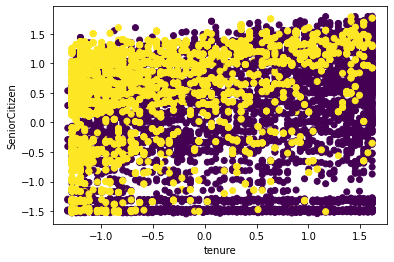

In [22]:
#plt.scatter(df2['tenure'], df2['SeniorCitizen'], df2['MonthlyCharges'], c = df2['Y'])
#plt.scatter(df2['tenure'], df2['SeniorCitizen'], c = df2['Y'])
plt.scatter(df2['tenure'], df2['MonthlyCharges'], c = df2['Y'])
plt.xlabel('tenure')
plt.ylabel('SeniorCitizen')
plt.show()

In [23]:
df_down = RandomUnderSampler()
X = df[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
y = df['Churn']
X_down, y_down = df_down.fit_sample(X_scaled, y)

In [24]:
pd.DataFrame(y_down).value_counts()

Churn
1        1869
0        1869
dtype: int64

In [25]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_down, y_down)

print("The accuracy of the model is: ",round(classification.score(X_down, y_down),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_down,classification.predict(X_down)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.46


### 6. Evaluate the model

Upscaling or downscaling makes no difference. Accuracy and kappa are about the same. It's not improving the model.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train_num, x_test_num, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=42)

In [28]:
classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train_num, y_train)

In [29]:
print("The accuracy of the model in the TEST set is: ", round(classification.score(x_test_num, y_test),2))

The accuracy of the model in the TEST set is:  0.8


In [30]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, classification.predict(x_test_num))

array([[1566,  131],
       [ 339,  289]], dtype=int64)

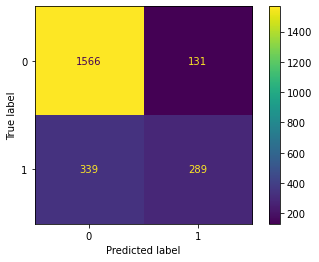

In [31]:
plot_confusion_matrix(classification, x_test_num, y_test)

In [34]:
predictions = classification.predict(x_test_num)
classification.score(x_test_num, y_test)
print (cohen_kappa_score(y_test, predictions))

0.4276038720221258


In [35]:
#import libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

In [36]:
print("The R2 of the linear model is: ",round(r2_score(y_test, predictions),2))

The R2 of the linear model is:  -0.03


In [37]:
#Computing MSE
mse = mean_squared_error(y_test, predictions)
print(round(mse,2))

0.2


In [38]:
#Computing RMSE
rmse = math.sqrt(mse)
print(round(rmse,2))

0.45


In [39]:
#Computing MAE
mae = mean_absolute_error(y_test, predictions)
print(round(mae,2))

0.2


In [44]:
x_test_num.shape

(2325, 3)

In [45]:
x_train_num.shape

(4718, 3)

In [46]:
df_test = pd.DataFrame(x_test_num)

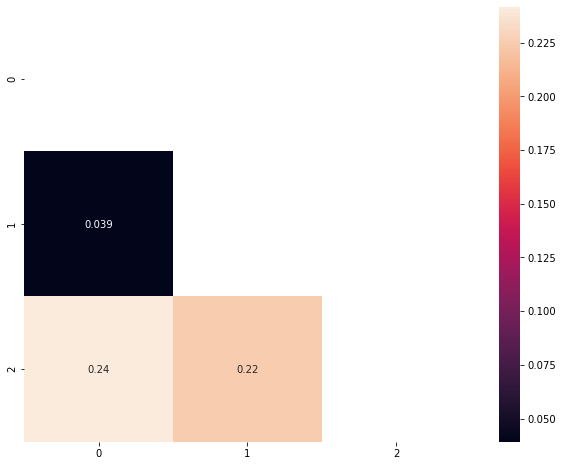

In [47]:
mask = np.zeros_like(df_test.corr()) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_test.corr(), mask=mask, annot=True)
plt.show()

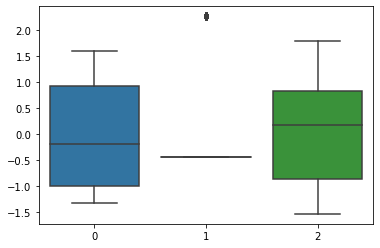

In [49]:
sns.boxplot(data=df_test)
plt.show()

### 8. Build and evaluate the logistic regression model using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
X = df[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
y = df['Churn']
X_sm, y_sm = smote.fit_sample(X_scaled, y)
pd.DataFrame(y_sm).value_counts()

In [ ]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)

print("The accuracy of the model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

There is not much improvement. The samples are fake and could belong to the majority class.

### 9. Build and evaluate the logistic regression model using Tomek links 

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks('majority')
X = df[['tenure', 'SeniorCitizen','MonthlyCharges']]
transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
y = df['Churn']
X_tl, y_tl = tl.fit_sample(X_scaled, y)
pd.DataFrame(y_tl).value_counts()

In [ ]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)

print("The accuracy of the model is: ",round(classification.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,classification.predict(X_tl)),2))

There is not much improvement. You don't really balance the data.